<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-Skates-b/blob/main/kapitza_function_organized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

For this assignment, we are coding for the stability of the kapitza pendulum driven at a high frequency.

## Psuedocode

1. **Import libraries:** Import numpy as np for basic arthimatic, matplotlib.pyplot as plt for plotting, and solve_ivp from scipy.integrate for solving ODEs.

2. **Define dimensionless quantities and parameters:**

3. **Define functions:** Define a function for the pendulum movement. Define a stability diagnostic.

4. **Set ranges for alpha and epsilon:**

5. **Solve equation of motion and sweep through alpha/epsilon parameter values:** Use `solve_ivp` to solve the equation of motion. Sweep through values of alpha and epsilon through a nested loop, and apply the stability diagnostic function to see which values hold stable or unstable.

6. **Create a heat map:**

7. **Add a boundary line to the heat map:**



## The Code

### Installing libraries and setting parameters

In [1]:
# installing libraries and setting parameters / other values

# installing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# parameter setting

w_d = 1
w_0 = 1
gamma = 1
y_p = 1
l = 1
# the big three parameters
zeta = z = gamma/w_d
epsilon = ep = w_0/w_d
alpha = a = y_p/l
# dimensionless time conversion
t = 1 # time??? CHECK CHECK CHECK
tau = T = w_d * t

# relationship condition between the three parameters
f = (ep**2 / a) # CHECK CHECK CHECK CHECK LATER***
print(f)

# OTHER
theta = np.pi # CHECK CHECK CHECK CHECK

1.0


### Creating functions (motion, stability diagnostic)

In [3]:
### FUNCTIONS
# Equation of Motion ODE
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
	"""
	This function defines the equtation of motion for a Kapitza pendulum
	PARAMETERS:
	tau : float, ndarray
		dimensionless time : tau = omega_d * t
	y : ndarray
		state variables [theta, ang_vel]
	alpha : float
		relative displacement of the pivot to the pendulum arm : alpha  = y_0/l
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient : zeta = gamma/omega_d

	RETURNS:
	dy/dtau : ndarray
		time derivitives of state variables
	"""
	theta, ang_vel = y # unpack state variables
	dtheta_dtau = ang_vel #define the angular velocity
	d2theta_dtau2 = -2 * zeta * dtheta_dtau - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
	dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
	return dy_dtau

# associated code for STABILITY DIAGNOSTIC
import numpy as np # so I don''t have to keep rerunning the library cell

def stability_diagnostic(theta_sol, delta):
  """
  This function defines the stability diagnostic for the kapitza pendulum.
  It checks if the final angular position (theta) iswithin a specified tolerance (delta) of np.pi.

  PARAMETERS
  theta_sol : ndarray
    This is the array of angular positions (theta) from the solve_ivp result
  delta : float
    This is the tolerance value. If the final angular position is within +/- delta of np.pi, the pendulum is considered stable (in the inverted position).

  RETURNS
  bool
    True if pendulum is stable (near np.pi)
    False otherwise
  """
  # extract the last angular position from the solution
  final_theta = theta_sol[-1] # what does this mean???
      # I should check if I need to change the kapitza function
  # check if it's within the tolerance
  if abs(final_theta - np.pi) < delta:
    return True
  else:
    return False


### Defining parameter ranges for alpha and epsilon

In [4]:
# associated code
import numpy as np

# define parameter ranges for alpha and epsilon
  # for ALPHA
alpha_min, alpha_max, num_alpha = 0.5, 3.0, 50
alpha_values = np.linspace(alpha_min, alpha_max, num_alpha)
  # for EPSILON
epsilon_min, epsilon_max, num_epsilon = 0.5, 3.0, 50
epsilon_values = np.linspace(epsilon_min, epsilon_max, num_epsilon)

# define a constant value for zeta
zeta = 0.5

# initialize the 2D array to store stability results
stability_map = np.zeros((num_alpha, num_epsilon))

print(f"Alpha values range from {alpha_min} to {alpha_max} with {num_alpha} steps.")
print(f"Epsilon values range from {epsilon_min} to {epsilon_max} with {num_epsilon} steps.")
print(f"Zeta is constant at: {zeta}")
print(f"Initialized stability_map of shape: {stability_map.shape}")


Alpha values range from 0.5 to 3.0 with 50 steps.
Epsilon values range from 0.5 to 3.0 with 50 steps.
Zeta is constant at: 0.5
Initialized stability_map of shape: (50, 50)


### Solving and parameter sweeps

In [5]:
# FOLLOWING DONNIE'S EXAMPLE
import numpy as np
from scipy.integrate import solve_ivp

# EQUATION OF MOTION
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
	"""
	This function defines the equtation of motion for a Kapitza pendulum
	PARAMETERS:
	tau : float, ndarray
		dimensionless time : tau = omega_d * t
	y : ndarray
		state variables [theta, ang_vel]
	alpha : float
		relative displacement of the pivot to the pendulum arm : alpha  = y_0/l
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient : zeta = gamma/omega_d

	RETURNS:
	dy/dtau : ndarray
		time derivitives of state variables
	"""
	theta, ang_vel = y # unpack state variables
	dtheta_dtau = ang_vel #define the angular velocity
	d2theta_dtau2 = -2 * zeta * dtheta_dtau - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
	dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
	return dy_dtau

In [10]:
# ran cells for the stability_diagnostic, and parameter values

# simulation parameters
n_decay = 100
delta_theta = 0.02
initial_theta = np.pi - delta_theta
ang_vel_0 = 0
y_0 = [initial_theta, ang_vel_0]

# stability diagnostic threshold
delta_stability_threshold = 0.01
# print statement (checking to see what it says)
print(f"Starting parameter sweep with {len(alpha_values) * len(epsilon_values)} simulations...")

# NESTED LOOPS
for i, current_alpha in enumerate(alpha_values):
  for j, current_epsilon in enumerate(epsilon_values):
    tau_max = n_decay/(2*zeta)
    tau_span = [0, tau_max]
    try:
      solution = solve_ivp(kapitza_pendulum, tau_span, y_0, args=(current_epsilon, current_alpha, zeta), method='RK45')
      theta_solution_over_time = solution.y[0]
      is_stable = stability_diagnostic(theta_solution_over_time, delta_stability_threshold)
      stability_map[i, j] = 1 if is_stable else 0
    except Exception as e:
      print(f"Error at alpha={current_alpha:.2f}, epsilon={current_epsilon:.2f}: {e}")
      stability_map[i, j] = 0

# print statements
print("Parameter sweep complete!")
print(f"First few rows of stability_map:\n{stability_map[:5, :5]}")

Starting parameter sweep with 2500 simulations...
Parameter sweep complete!
First few rows of stability_map:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Heat Maps (with and without the alpha line)

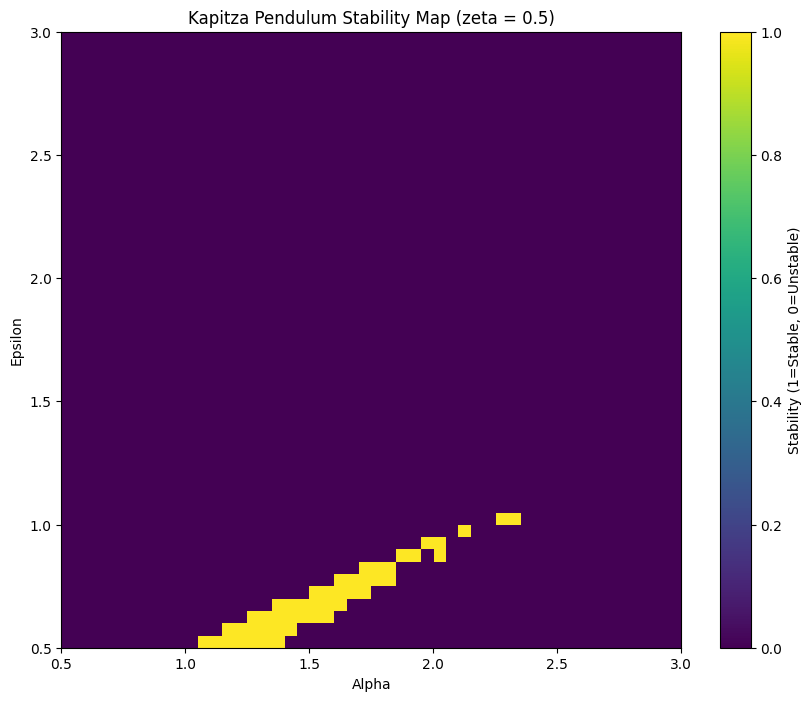

Stability map plotted!


In [11]:
# heat map creation
import matplotlib.pyplot as plt

# creating the heat map
plt.figure(figsize=(10, 8))
plt.imshow(stability_map.T, extent=[alpha_min, alpha_max, epsilon_min, epsilon_max], origin='lower', aspect='auto', cmap='viridis')

plt.colorbar(label='Stability (1=Stable, 0=Unstable)')
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.title('Kapitza Pendulum Stability Map (zeta = 0.5)')
plt.grid(False)
plt.show()

print("Stability map plotted!")

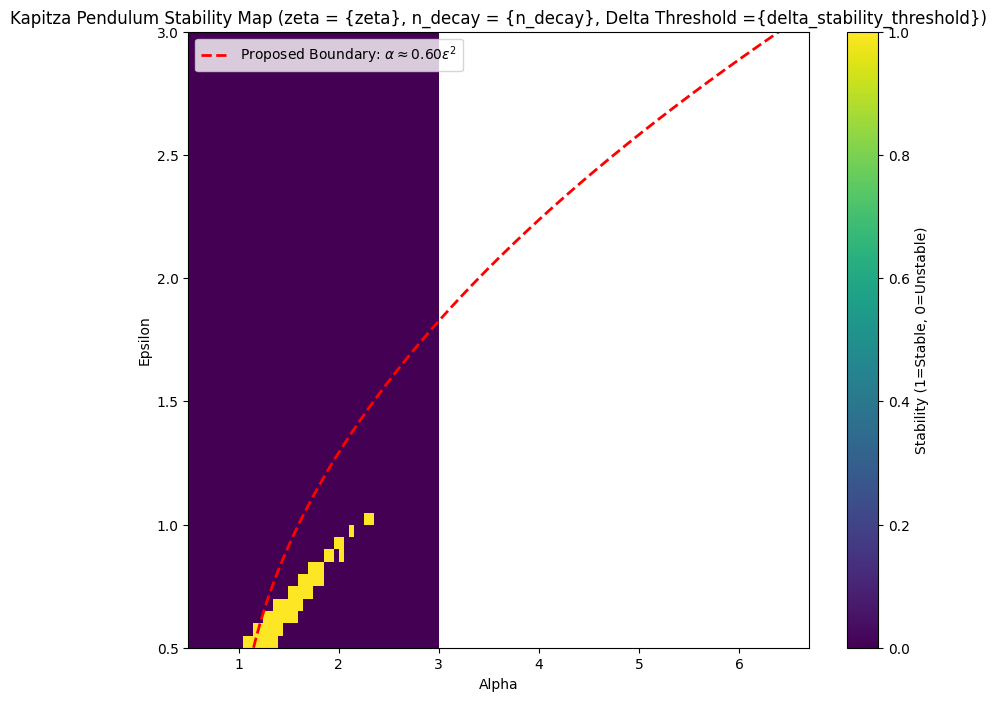

Stability map plotted with a red alpha curve!


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# assumptions made: alpha_values, epsilon_values, alpha/epsilon_min, alpha/epsilon_max, stability_map,
#  zeta, n_decay, and delta_stability_threshold are DEFINED (from previous cells)

# defined coefficient
C = 0.6 # our random* coefficient
# defined alpha curve ; I added 1 to the value so I could see the line closer to the data that's reading as stable!!!
alpha_curve = (C * epsilon_values**2) + 1

# plotting our heat map!
plt.figure(figsize=(10, 8))
plt.imshow(stability_map.T, extent=[alpha_min, alpha_max, epsilon_min, epsilon_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Stability (1=Stable, 0=Unstable)')

# Superimposing the curve
plt.plot(alpha_curve, epsilon_values, color='red', linestyle='--', linewidth=2, label=rf'Proposed Boundary: $\alpha \approx {C:.2f}\epsilon^2$')

# adding labels/title
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.title('Kapitza Pendulum Stability Map (zeta = {zeta}, n_decay = {n_decay}, Delta Threshold ={delta_stability_threshold})')
plt.grid(False)
plt.legend()
plt.show()

# print statements
print("Stability map plotted with a red alpha curve!")
